## The flow past a Joukowski airfoil ##

The generation of streamlines of the flow past a Joukowski airfoil follows this [chapter](http://brennen.caltech.edu/fluidbook/basicfluiddynamics/potentialflow/Complexvariables/joukowskiairfoils.pdf) from the Internet Book of Fluid Dynamics.


Visualization of streamlines is based on the property of the complex flow
with respect to a conformal transformation:
    
If w is the complex plane of the airfoil,  z is the complex plane of the circle as the section in a circular cylinder,
and $w=w(z)$ is a conformal tranformatiom from the outside of the disc mapped to the airfoil,
then the complex flow, $F$, past the airfoil is related to the complex flow, $f$, past the circle(cylinder) by:
$F(w)=f(z(w))$ or equivalently $F(w(z))=f(z)$. 

The streamlines of each flow are defined as contour plots of the imaginary part of the complex flow.
In our case, due to the latter relation, we plot the contours of the stream function, $Imag{(f)}$, over   $w(z)$, where $w(z)$ is the Joukowski transformation, that maps  a suitable circle onto the airfoil.

In [1]:
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def Juc(z, lam):#Joukowski transformation
    return z+(lam**2)/z

In [3]:
def circle(C, R):
    t=np.linspace(0,2*np.pi, 200)
    return C+R*np.exp(1j*t)

In [4]:
def deg2radians(deg):
    return deg*np.pi/180

In [5]:
plt.rcParams['figure.figsize'] = 8, 8

In [6]:
def streamlines(alpha=10, beta=5, V_inf=1, R=1, ratio=1.2):
    #ratio=R/lam
    alpha=deg2radians(alpha)# angle of attack
    beta=deg2radians(beta)# -beta is the argument of the complex no (Joukovski parameter - circle center)
    if ratio<=1: #R/lam must be >1
        raise ValueError('R/lambda must be >1')
    lam=R/ratio#lam is the parameter of the Joukowski transformation

    center_c=lam-R*np.exp(-1j*beta)# Center of the circle
    x=np.arange(-3,3, 0.1)
    y=np.arange(-3,3, 0.1)
    x,y=np.meshgrid(x,y)
    z=x+1j*y
    z=ma.masked_where(np.absolute(z-center_c)<=R, z)
    Z=z-center_c
    Gamma=-4*np.pi*V_inf*R*np.sin(beta+alpha)#circulation
    # np.log(Z) cannot be calculated correctly due to a numpy bug np.log(MaskedArray);
    #https://github.com/numpy/numpy/issues/8516
    # we perform an elementwise computation
    U=np.zeros(Z.shape, dtype=np.complex)
    with np.errstate(divide='ignore'):#avoid warning when evaluates np.log(0+1jy).
                                     #In this case the arg is arctan(y/0)+cst
        for m in range(Z.shape[0]):
            for n in range(Z.shape[1]):
                #U[m,n]=Gamma*np.log(Z[m,n]/R)/(2*np.pi)# 
                 U[m,n]=Gamma*np.log((Z[m,n]*np.exp(-1j*alpha))/R)/(2*np.pi)
    c_flow=V_inf*Z*np.exp(-1j*alpha) + (V_inf*np.exp(1j*alpha)*R**2)/Z - 1j*U #the complex flow

    J=Juc(z, lam)#Joukovski transformation of the z-plane minus the disc D(center_c, R)
    Circle=circle(center_c, R)
    Airfoil=Juc(Circle, lam)# airfoil 
    return J, c_flow.imag, Airfoil


In [7]:
J, stream_func, Airfoil=streamlines()
levels=np.arange(-2.8, 3.8, 0.2).tolist()

Matplotlib plot of the streamlines:

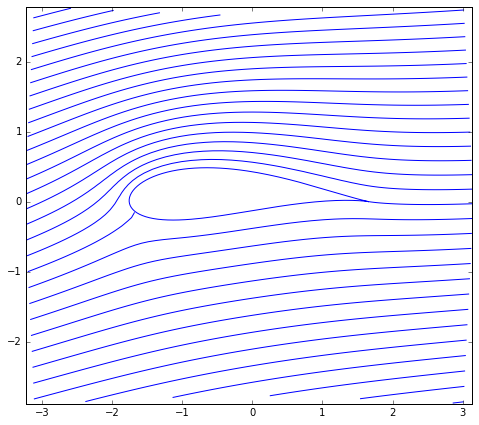

In [8]:
fig=plt.figure()
ax=fig.add_subplot(111)
cp=ax.contour(J.real, J.imag, stream_func,levels=levels, colors='blue', linewidths=1,
                linestyles='solid')# this means that the flow is evaluated at Juc(z) since c_flow(Z)=C_flow(csi(Z))

ax.plot(Airfoil.real, Airfoil.imag)
ax.set_aspect('equal')
  

Plotly plot of the streamlines:

In [9]:
import plotly.plotly as py

In [10]:
py.sign_in('empet', 'my_api_key')

In [15]:
conts=cp.allsegs  #  get the segments of line computed via plt.contour
xline=[]
yline=[]

for  cont in conts:
    if len(cont)!=0:
        for arr in cont: 
                
                    xline+=arr[:,0].tolist()
                    yline+=arr[:,1].tolist()
                    xline.append(None) 
                    yline.append(None)

flowlines=dict(x=xline, 
               y=yline, 
               type='scatter', 
               mode='lines', 
               line=dict(color='blue', width=1)
              ) 

#define a filled path (a shape) representing the airfoil

shapes=[]
path='M'
for pt in Airfoil:
    path+=str(pt.real)+', '+str(pt.imag)+' L '
shapes.append(dict(line=dict(color='blue',   
                             width=1.5
                            ),
                   path=  path,
                   type='path',
                   fillcolor='#edf4fe'  
                  )
             )

axis=dict(showline=True, zeroline=False, ticklen=4, mirror=True, showgrid=False)

layout=dict(title="The streamlines for the flow past a Joukowski airfoil<br>Angle of attack, alpha=10 degrees",
            font=dict(family='Balto'),
            showlegend=False, 
            autosize=False, 
            width=600, 
            height=600, 
            xaxis=dict(axis, **{'range': [ma.min(J.real), ma.max(J.real)]}),
            yaxis=dict(axis, **{'range':[ma.min(J.imag), ma.max(J.imag)]}),
            shapes=shapes,
            plot_bgcolor='#c1e3ff',
            hovermode='closest',
           )
fig=dict(data=[flowlines],layout=layout)
py.iplot(fig, filename='Joucstreamlns')

In [16]:
from IPython.core.display import HTML
def  css_styling():
    styles = open("./custom.css", "r").read()
    return HTML(styles)
css_styling()